In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from scroutines import basicu
from scroutines.config_plots import *
import importlib
importlib.reload(basicu)

<module 'scroutines.basicu' from '/u/project/zipursky/f7xiesnm/code/scroutines/scroutines/basicu.py'>

In [2]:
sns.set_context('talk')

In [3]:
outdir = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/"
outdir

'/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/'

# get data

In [4]:
f = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq-annot_v2.csv'
df2 = pd.read_csv(f)
df2

,gene,group,ispicked,P17on,P14,DR,DR_DE,DR_updn
0,Matn2,A2,True,A,BC,1,False,NaN
1,Fam126a,A2,False,A,unsure,1,False,NaN
2,Egfem1,A2,True,A,unsure,unsure,False,NaN
3,Gm19410,A2,False,A,unsure,1,False,NaN
4,Grk3,A2,False,A,unsure,1,False,NaN
...,...,...,...,...,...,...,...,...
281,Brinp3,C3,True,C,BC,unsure,False,NaN
282,Ell2,C3,True,C,unsure,3,True,DR_up
283,Gm21949,C3,False,C,unsure,unsure,False,NaN
284,Jdp2,C3,True,C,BC,3,False,NaN


In [5]:
# get updated cell types
f = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/allL23_newtypes.csv"
meta = pd.read_csv(f, index_col=0)
meta

/tmp/ipykernel_230068/12491127.py:3: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f, index_col=0)


,Class_broad,Doublet,Doublet Score,batch,leiden,n_counts,n_genes,percent_mito,sample,Type,Subclass,cond,easitype,umap1,umap2,easisample,easicond,newtype
AAACGCTCACTTCATT-1-P8_1a-P8,Excitatory,False,0.025713,1,0,23384.0,4943,0.000128,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGATAGGTGCATG-1-P8_1a-P8,Excitatory,False,0.011883,1,0,17774.0,4698,0.000169,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGGCCAGTATACC-1-P8_1a-P8,Excitatory,False,0.024667,1,0,15872.0,4173,0.000126,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCCATATACCG-1-P8_1a-P8,Excitatory,False,0.027921,1,0,20076.0,4761,0.000050,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCTCAGATGCT-1-P8_1a-P8,Excitatory,False,0.009527,1,4,19061.0,4601,0.000000,P8_1a,L2/3_BC,L2/3,P8NR,L2/3_C,NaN,NaN,1a,1-P08NR,L2/3_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGTTGTTG-1-P38_dr_1a,NaN,False,0.042872,11,1,11379.0,3568,0.000879,P38_dr_1a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,1a,2-P38DR,L2/3_B
TTTGGTTTCTGCCTGT-1-P38_dr_2b,NaN,False,0.007108,2,1,16050.0,3104,0.000062,P38_dr_2b,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2b,2-P38DR,L2/3_B
TTTGTTGCACCGGTCA-1-P38_dr_2a,NaN,False,0.030928,2,1,13955.0,3739,0.001146,P38_dr_2a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2a,2-P38DR,L2/3_B
TTTGTTGGTGGCTAGA-1-P38_dr_2b,NaN,False,0.015884,3,4,7272.0,2789,0.000963,P38_dr_2b,L2/3_2,L2/3,P38DR,L2/3_B,NaN,NaN,2b,2-P38DR,L2/3_A


In [6]:
ddir = '../../data/cheng21_cell_scrna/organized/'
files = [
    'P28NR.h5ad',
    'P38NR.h5ad',
    
    # 'P28DR.h5ad',
    # 'P38DR.h5ad',
    'P28DL.h5ad',
] 

In [7]:
pbulks = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 3,2,3,-1, #42-3,-1 # remove 3 L4 types

for f in files:
    print(f)
    
    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values
    
    adata = adata[adata.obs['Type'].str.contains('L2/3')]
    mat = adata.X
    
    # update new type 
    tmp = adata.obs.copy()
    tmp['newtype'] = tmp['Type']
    tmp.update(meta[['newtype']])
    types = tmp['newtype'].values
    # types = tmp['Subclass'].astype(str).values
    
    # 1 or 2
    sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1].replace('3', '2')).astype(str).values
    sample_and_type = sample_codes + "_" + types
    unqs, cnts = np.unique(sample_and_type, return_counts=True)
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 
    
    # check all types + reps are the same
    if len(xclsts) > 0:
        if not np.all(_xclsts == xclsts):
            raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
        if not np.all(_xclsts == unqs):
            raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
    else:
        xclsts = _xclsts
        print(xclsts)
        
    print(Xk_ln.shape)
    pbulks.append(Xk_ln)
    xcnsts.append(cnts)
    
pbulks = np.array(pbulks)
xcnsts = np.array(xcnsts)
print(pbulks.shape)
pbulks = pbulks.reshape(ncond,nrep,nclst,-1)
xcnsts = xcnsts.reshape(ncond,nrep,nclst)
xclsts = xclsts.reshape(      nrep,nclst)
print(pbulks.shape)

P28NR.h5ad
['1_L2/3_A' '1_L2/3_B' '1_L2/3_C' '2_L2/3_A' '2_L2/3_B' '2_L2/3_C']
(6, 53801)
P38NR.h5ad
(6, 53801)
P28DL.h5ad
(6, 53801)
(3, 6, 53801)
(3, 2, 3, 53801)


In [8]:
pbulks = pbulks.reshape(2,4,3,53801)
print(pbulks.shape)

(2, 4, 3, 53801)


In [9]:
# check the pbulks are good -- log10(CPM+1) for each sample
checkpbulks = np.sum(np.power(10, pbulks)-1, axis=-1)
checkpbulks.shape, np.all(np.abs(checkpbulks-1e6) < 1e-6)

((2, 4, 3), True)

In [10]:
# xclsts_short = np.array([clst[len("1a_"):] for clst in xclsts[0]]) #, '_'
xclsts_short = np.array([clst[len("1_"):] for clst in xclsts[0]]) #, '_'
xclsts_short, xclsts_short.shape

(array(['L2/3_A', 'L2/3_B', 'L2/3_C'], dtype='<U6'), (3,))

# filter out small bulk profiles

In [11]:
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
xclsts_sel = xclsts_short[numcells.min(axis=1)>50]
unq_types = xclsts_sel
xclsts_selidx = basicu.get_index_from_array(xclsts_short, xclsts_sel)
pbulks = pbulks[:,:,xclsts_selidx,:]
xclsts_sel, xclsts_selidx, xclsts_sel.shape

(array(['L2/3_A', 'L2/3_B', 'L2/3_C'], dtype='<U6'), array([0, 1, 2]), (3,))

In [12]:
numcells.min(axis=1).sort_values()

L2/3_A    108
L2/3_C    190
L2/3_B    422
dtype: int64

# filter out unexpressed genes

In [13]:
tensor_nr = pbulks[0].T
tensor_dr = pbulks[1].T
print(tensor_nr.shape)
print(tensor_dr.shape)

# mean exp of CPM=10 in any subclass in either NR or DR
expressed_nr  = np.any(np.mean(tensor_nr, axis=2) > np.log10(10+1), axis=1) 
expressed_dr  = np.any(np.mean(tensor_dr, axis=2) > np.log10(10+1), axis=1) 
expressed_any = np.logical_or(expressed_nr, expressed_dr)

genes_comm = genes[expressed_any]
genes_cidx = np.arange(len(genes))[expressed_any] 
tensor_nr = pbulks[0].T[genes_cidx]
tensor_dr = pbulks[1].T[genes_cidx]

print(tensor_nr.shape)
print(tensor_dr.shape)

(53801, 3, 4)
(53801, 3, 4)
(9241, 3, 4)
(9241, 3, 4)


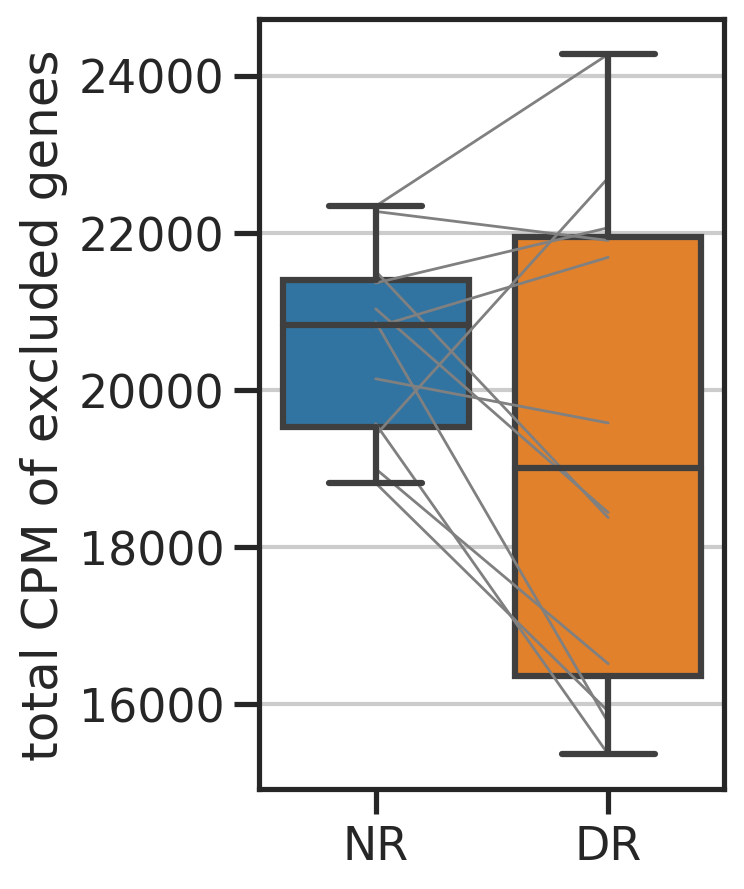

In [14]:
idx = np.arange(len(genes))[~expressed_any]
tensor_nr_ctrl = pbulks[0].T[idx]
tensor_dr_ctrl = pbulks[1].T[idx]

a = np.sum(np.power(10, tensor_nr_ctrl)-1, axis=0).ravel()
b = np.sum(np.power(10, tensor_dr_ctrl)-1, axis=0).ravel()

fig, ax = plt.subplots(figsize=(3,5))
for ai, bi in zip(a,b):
    ax.plot([0,1], [ai,bi], '-', color='gray', linewidth=1, markersize=1)
sns.boxplot([a,b], ax=ax)
ax.set_ylabel('total CPM of excluded genes')
ax.set_xticklabels(['NR', 'DR'])
plt.show()

# correlation

In [15]:
pbulks2 = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 4,2,3,-1, #42-3,-1 # remove 3 L4 types

for f in files:
    print(f)
    
    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values
    
    adata = adata[adata.obs['Type'].str.contains('L2/3')]
    mat = adata.X
    
    # update new type 
    tmp = adata.obs.copy()
    tmp['easitype'] = tmp['Type']
    tmp.update(meta[['easitype']])
    types = tmp['easitype'].values
    # types = tmp['Subclass'].astype(str).values
    
    # 1 or 2
    sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1].replace('3', '2')).astype(str).values
    sample_and_type = sample_codes + "_" + types
    unqs, cnts = np.unique(sample_and_type, return_counts=True)
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 
    
    # check all types + reps are the same
    if len(xclsts) > 0:
        if not np.all(_xclsts == xclsts):
            raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
        if not np.all(_xclsts == unqs):
            raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
    else:
        xclsts = _xclsts
        print(xclsts)
        
    print(Xk_ln.shape)
    pbulks2.append(Xk_ln)
    xcnsts.append(cnts)
    
pbulks2 = np.array(pbulks2)
xcnsts = np.array(xcnsts)
print(pbulks2.shape)
pbulks2 = pbulks2.reshape(ncond,nrep,nclst,-1)
xcnsts = xcnsts.reshape(ncond,nrep,nclst)
xclsts = xclsts.reshape(      nrep,nclst)
print(pbulks2.shape)

P28NR.h5ad
['1_L2/3_A' '1_L2/3_B' '1_L2/3_C' '2_L2/3_A' '2_L2/3_B' '2_L2/3_C']
(6, 53801)
P38NR.h5ad
(6, 53801)
P28DR.h5ad
(6, 53801)
P38DR.h5ad
(6, 53801)
(4, 6, 53801)
(4, 2, 3, 53801)


In [16]:
pbulks2 = pbulks2.reshape(2,4,3,53801)
print(pbulks2.shape)

(2, 4, 3, 53801)


In [17]:
pbulks.shape, pbulks2.shape

((2, 4, 3, 53801), (2, 4, 3, 53801))

In [18]:
pbulks3 = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 4,1,3,-1, #42-3,-1 # remove 3 L4 types

for f in files:
    print(f)
    
    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values
    
    adata = adata[adata.obs['Type'].str.contains('L2/3')]
    mat = adata.X
    
    # update new type 
    tmp = adata.obs.copy()
    tmp['newtype'] = tmp['Type']
    tmp.update(meta[['newtype']])
    types = tmp['newtype'].values
    # types = tmp['Subclass'].astype(str).values
    
    # 1 or 2
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1].replace('3', '2')).astype(str).values
    # sample_and_type = sample_codes + "_" + types
    sample_and_type = types
    unqs, cnts = np.unique(sample_and_type, return_counts=True)
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 
    
    # check all types + reps are the same
    if len(xclsts) > 0:
        if not np.all(_xclsts == xclsts):
            raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
        if not np.all(_xclsts == unqs):
            raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
    else:
        xclsts = _xclsts
        print(xclsts)
        
    print(Xk_ln.shape)
    pbulks3.append(Xk_ln)
    xcnsts.append(cnts)
    
pbulks3 = np.array(pbulks3)
xcnsts = np.array(xcnsts)
print(pbulks3.shape)
pbulks3 = pbulks3.reshape(ncond,nrep,nclst,-1)
xcnsts = xcnsts.reshape(ncond,nrep,nclst)
xclsts = xclsts.reshape(      nrep,nclst)
print(pbulks3.shape)



P28NR.h5ad
['L2/3_A' 'L2/3_B' 'L2/3_C']
(3, 53801)
P38NR.h5ad
(3, 53801)
P28DR.h5ad
(3, 53801)
P38DR.h5ad
(3, 53801)
(4, 3, 53801)
(4, 1, 3, 53801)


In [19]:
pbulks3 = pbulks3.reshape(2,2,3,53801)
print(pbulks3.shape)

(2, 2, 3, 53801)


In [20]:
pbulks4 = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 4,1,3,-1, #42-3,-1 # remove 3 L4 types

for f in files:
    print(f)
    
    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values
    
    adata = adata[adata.obs['Type'].str.contains('L2/3')]
    mat = adata.X
    
    # update new type 
    tmp = adata.obs.copy()
    tmp['easitype'] = tmp['Type']
    tmp.update(meta[['easitype']])
    types = tmp['easitype'].values
    # types = tmp['Subclass'].astype(str).values
    
    # 1 or 2
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1].replace('3', '2')).astype(str).values
    # sample_and_type = sample_codes + "_" + types
    sample_and_type = types
    unqs, cnts = np.unique(sample_and_type, return_counts=True)
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 
    
    # check all types + reps are the same
    if len(xclsts) > 0:
        if not np.all(_xclsts == xclsts):
            raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
        if not np.all(_xclsts == unqs):
            raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
    else:
        xclsts = _xclsts
        print(xclsts)
        
    print(Xk_ln.shape)
    pbulks4.append(Xk_ln)
    xcnsts.append(cnts)
    
pbulks4 = np.array(pbulks4)
xcnsts = np.array(xcnsts)
print(pbulks4.shape)
pbulks4 = pbulks4.reshape(ncond,nrep,nclst,-1)
xcnsts = xcnsts.reshape(ncond,nrep,nclst)
xclsts = xclsts.reshape(      nrep,nclst)
print(pbulks4.shape)

P28NR.h5ad
['L2/3_A' 'L2/3_B' 'L2/3_C']
(3, 53801)
P38NR.h5ad
(3, 53801)
P28DR.h5ad
(3, 53801)
P38DR.h5ad
(3, 53801)
(4, 3, 53801)
(4, 1, 3, 53801)


In [21]:
pbulks4 = pbulks4.reshape(2,2,3,53801)
print(pbulks4.shape)

(2, 2, 3, 53801)


In [22]:
pbulks5 = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 2,1,3,-1, #42-3,-1 # remove 3 L4 types

for f in np.array(files)[[0,2]]:
    print(f)
    
    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values
    
    adata = adata[adata.obs['Type'].str.contains('L2/3')]
    mat = adata.X
    
    # update new type 
    tmp = adata.obs.copy()
    tmp['newtype'] = tmp['Type']
    tmp.update(meta[['newtype']])
    types = tmp['newtype'].values
    # types = tmp['Subclass'].astype(str).values
    
    # 1 or 2
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1].replace('3', '2')).astype(str).values
    # sample_and_type = sample_codes + "_" + types
    sample_and_type = types
    unqs, cnts = np.unique(sample_and_type, return_counts=True)
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 
    
    # check all types + reps are the same
    if len(xclsts) > 0:
        if not np.all(_xclsts == xclsts):
            raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
        if not np.all(_xclsts == unqs):
            raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
    else:
        xclsts = _xclsts
        print(xclsts)
        
    print(Xk_ln.shape)
    pbulks5.append(Xk_ln)
    xcnsts.append(cnts)
    
pbulks5 = np.array(pbulks5)
xcnsts = np.array(xcnsts)
print(pbulks5.shape)
pbulks5 = pbulks5.reshape(ncond,nrep,nclst,-1)
xcnsts = xcnsts.reshape(ncond,nrep,nclst)
xclsts = xclsts.reshape(      nrep,nclst)
print(pbulks5.shape)

P28NR.h5ad
['L2/3_A' 'L2/3_B' 'L2/3_C']
(3, 53801)
P28DR.h5ad
(3, 53801)
(2, 3, 53801)
(2, 1, 3, 53801)


In [23]:
pbulks6 = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 2,1,3,-1, #42-3,-1 # remove 3 L4 types

for f in np.array(files)[[0,2]]:
    print(f)
    
    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values
    
    adata = adata[adata.obs['Type'].str.contains('L2/3')]
    mat = adata.X
    
    # update new type 
    tmp = adata.obs.copy()
    tmp['easitype'] = tmp['Type']
    tmp.update(meta[['easitype']])
    types = tmp['easitype'].values
    # types = tmp['Subclass'].astype(str).values
    
    # 1 or 2
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1].replace('3', '2')).astype(str).values
    # sample_and_type = sample_codes + "_" + types
    sample_and_type = types
    unqs, cnts = np.unique(sample_and_type, return_counts=True)
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 
    
    # check all types + reps are the same
    if len(xclsts) > 0:
        if not np.all(_xclsts == xclsts):
            raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
        if not np.all(_xclsts == unqs):
            raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
    else:
        xclsts = _xclsts
        print(xclsts)
        
    print(Xk_ln.shape)
    pbulks6.append(Xk_ln)
    xcnsts.append(cnts)
    
pbulks6 = np.array(pbulks6)
xcnsts = np.array(xcnsts)
print(pbulks6.shape)
pbulks6 = pbulks6.reshape(ncond,nrep,nclst,-1)
xcnsts = xcnsts.reshape(ncond,nrep,nclst)
xclsts = xclsts.reshape(      nrep,nclst)
print(pbulks6.shape)

P28NR.h5ad
['L2/3_A' 'L2/3_B' 'L2/3_C']
(3, 53801)
P28DR.h5ad
(3, 53801)
(2, 3, 53801)
(2, 1, 3, 53801)


In [24]:
type_genes = df2['gene'].values
type_genes_idx = basicu.get_index_from_array(genes, type_genes)

In [25]:
def get_corr(pbulks, gidx):
    """
    """
    mat_a = pbulks[:,:,0,:].reshape(2*4,-1).T[gidx]
    mat_b = pbulks[:,:,1,:].reshape(2*4,-1).T[gidx]
    mat_c = pbulks[:,:,2,:].reshape(2*4,-1).T[gidx]
    mat_all = np.hstack([mat_a, mat_b, mat_c])
    mat_zscore = basicu.zscore(mat_all, axis=0) #.mean(axis=1) #u
    corr = np.corrcoef(mat_zscore.T)
    
    return corr

def get_corr_v2(pbulks, gidx):
    """
    """
    mat_a = pbulks[:,:,0,:].reshape(4,-1).T[gidx]
    mat_b = pbulks[:,:,1,:].reshape(4,-1).T[gidx]
    mat_c = pbulks[:,:,2,:].reshape(4,-1).T[gidx]
    mat_all = np.hstack([mat_a, mat_b, mat_c])
    mat_zscore = basicu.zscore(mat_all, axis=0) #.mean(axis=1) #u
    corr = np.corrcoef(mat_zscore.T)
    
    return corr

def get_corr_v3(pbulks, gidx):
    """
    """
    mat_a = pbulks[:,:,0,:].reshape(2,-1).T[gidx]
    mat_b = pbulks[:,:,1,:].reshape(2,-1).T[gidx]
    mat_c = pbulks[:,:,2,:].reshape(2,-1).T[gidx]
    mat_all = np.hstack([mat_a, mat_b, mat_c])
    mat_zscore = basicu.zscore(mat_all, axis=0) #.mean(axis=1) #u
    corr = np.corrcoef(mat_zscore.T)
    
    return corr

In [26]:
corr1 = get_corr(pbulks, type_genes_idx)
corr2 = get_corr(pbulks2, type_genes_idx)
corr3 = get_corr_v2(pbulks3, type_genes_idx)
corr4 = get_corr_v2(pbulks4, type_genes_idx)
corr5 = get_corr_v3(pbulks5, type_genes_idx)
corr6 = get_corr_v3(pbulks6, type_genes_idx)

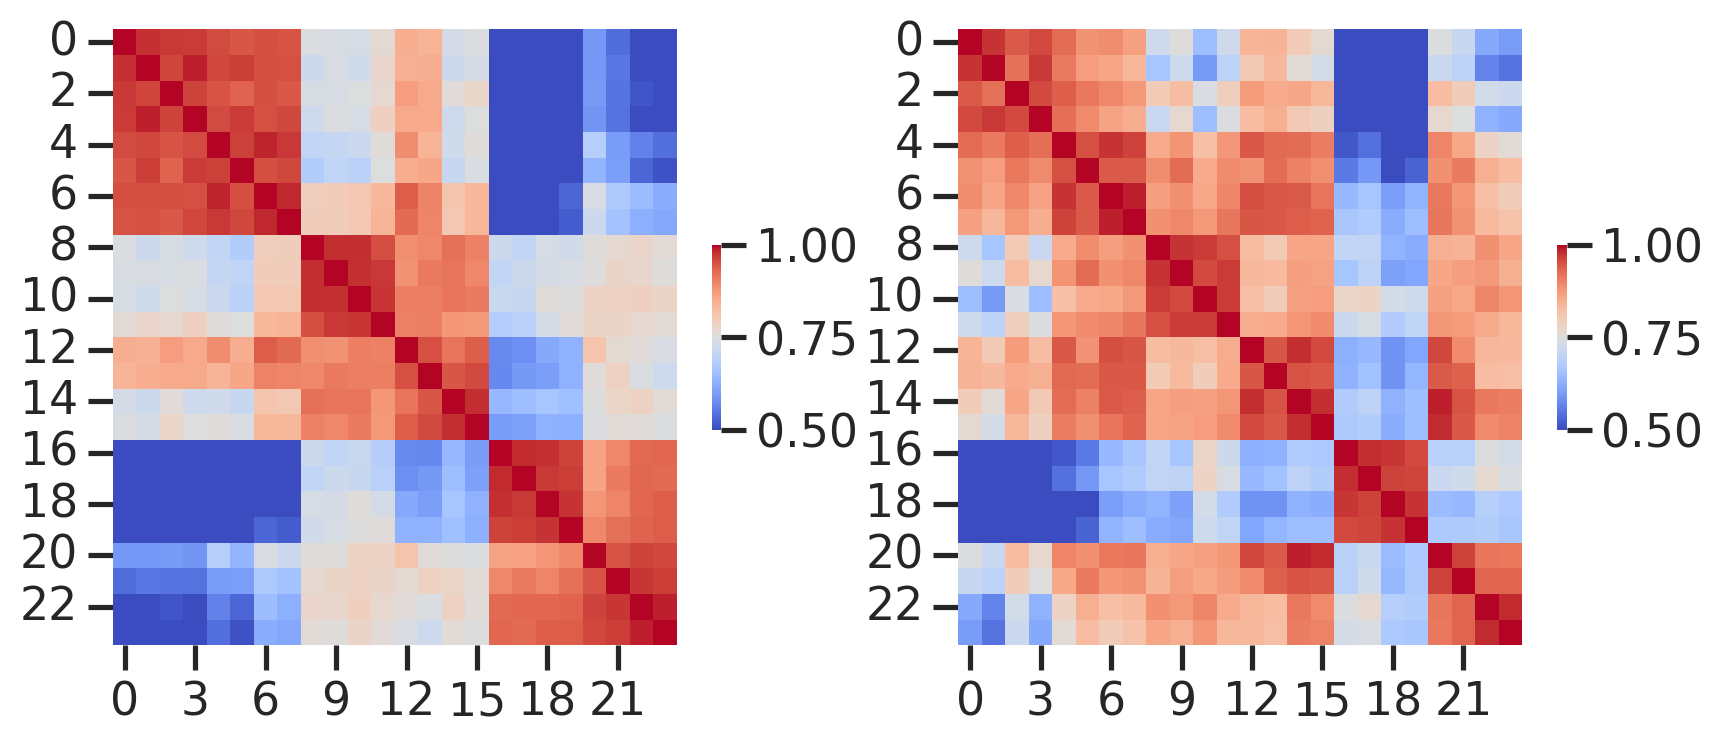

In [27]:
fig, axs = plt.subplots(1,2,figsize=(2*5,1*4))
ax = axs[0]
sns.heatmap(corr1, cmap='coolwarm', ax=ax, vmin=0.5, vmax=1, cbar_kws=dict(shrink=0.3))
ax = axs[1]
sns.heatmap(corr2, cmap='coolwarm', ax=ax, vmin=0.5, vmax=1, cbar_kws=dict(shrink=0.3))
plt.show()

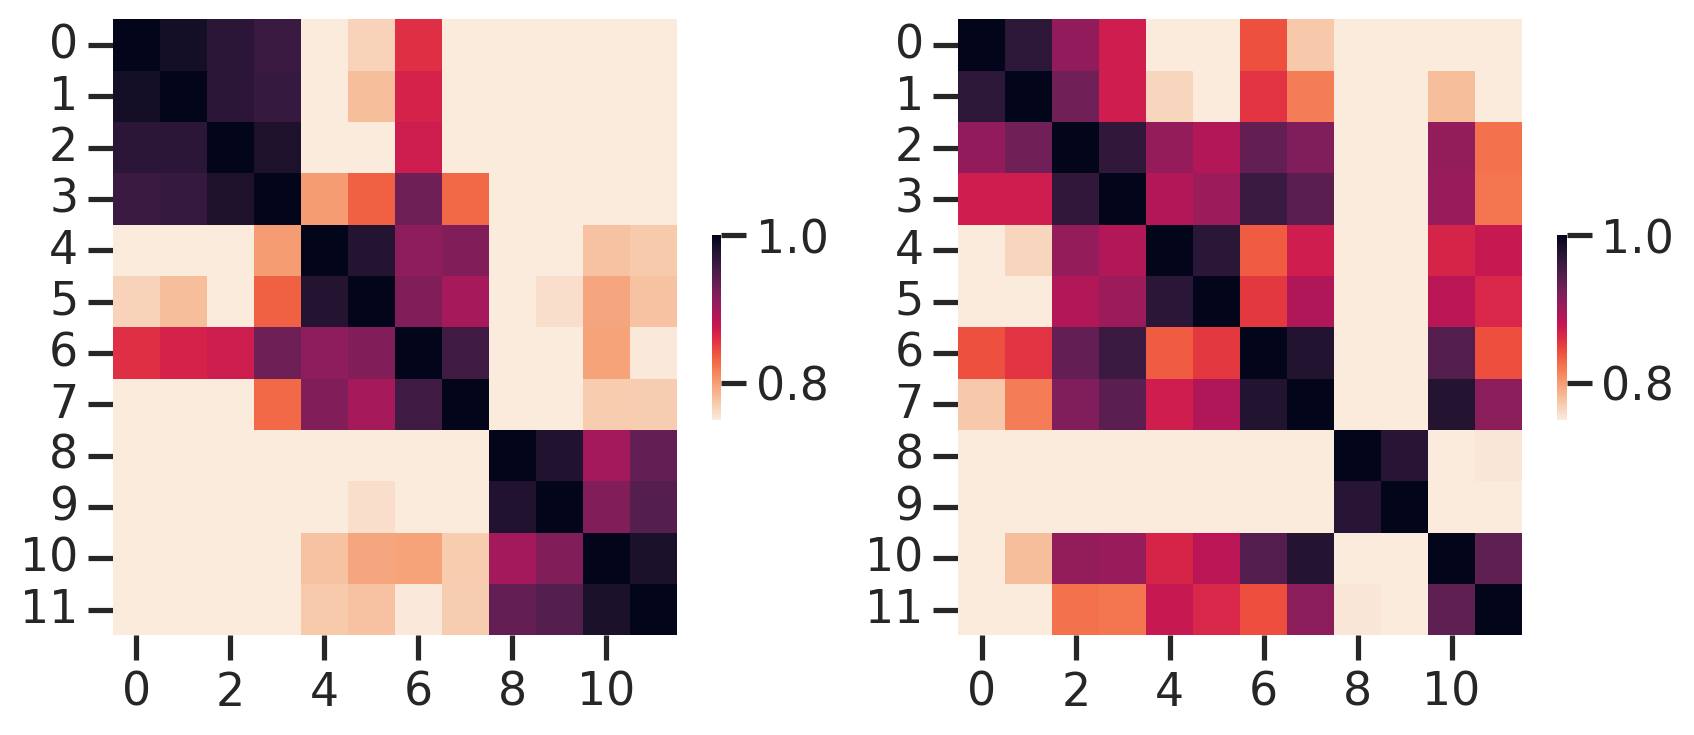

In [28]:
fig, axs = plt.subplots(1,2,figsize=(2*5,1*4))
ax = axs[0]
sns.heatmap(corr3, cmap='rocket_r', ax=ax, vmin=0.75, vmax=1, cbar_kws=dict(shrink=0.3))
ax = axs[1]
sns.heatmap(corr4, cmap='rocket_r', ax=ax, vmin=0.75, vmax=1, cbar_kws=dict(shrink=0.3))
plt.show()

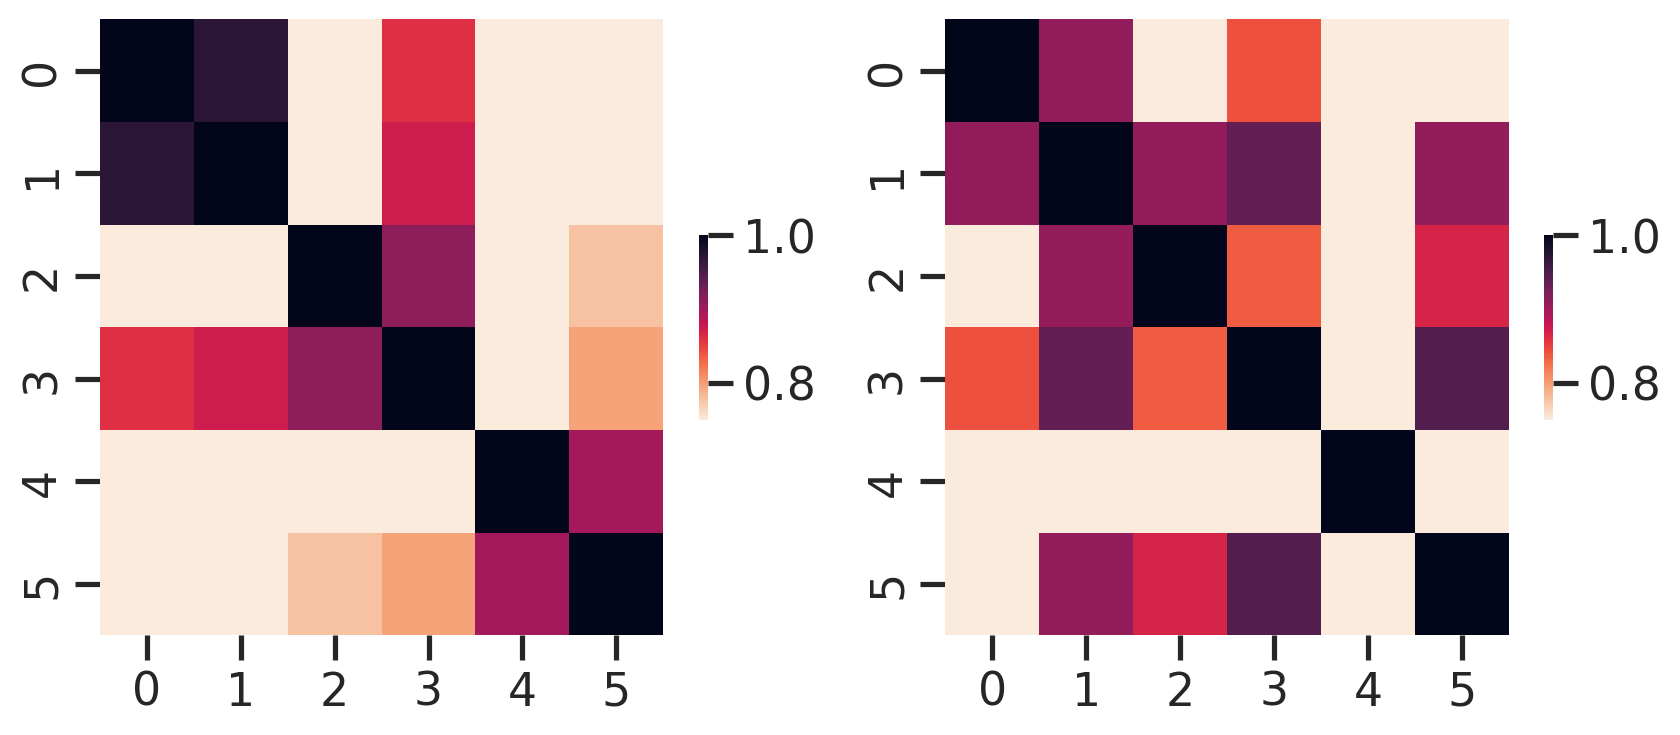

In [29]:
fig, axs = plt.subplots(1,2,figsize=(2*5,1*4))
ax = axs[0]
sns.heatmap(corr5, cmap='rocket_r', ax=ax, vmin=0.75, vmax=1, cbar_kws=dict(shrink=0.3))
ax = axs[1]
sns.heatmap(corr6, cmap='rocket_r', ax=ax, vmin=0.75, vmax=1, cbar_kws=dict(shrink=0.3))
plt.show()

In [30]:
pbulks2.shape

(2, 4, 3, 53801)

In [31]:
def get_corr_new(pbulks, gidx):
    """
    """
    mat_nr = pbulks[0,:,:,:][:,:,gidx].T
    mat_nr = mat_nr.reshape(-1,mat_nr.shape[1]*mat_nr.shape[2])
    mat_dr = pbulks[1,:,:,:][:,:,gidx].T
    mat_dr = mat_dr.reshape(-1,mat_dr.shape[1]*mat_dr.shape[2])
    
    n = mat_nr.shape[1]
    mat_all = np.hstack([mat_nr, mat_dr])
    mat_zscore = basicu.zscore(mat_all, axis=0) #.mean(axis=1) #u
    corr = basicu.spearman_corrcoef(mat_zscore.T[:n], mat_zscore.T[n:])[:n,n:]
    
    # print(mat_nr.shape, mat_dr.shape)
    # print(mat_all.shape) #nr.shape, mat_dr.shape)
    # print(mat_zscore.shape)
    
    return corr
    
#     return corr

In [32]:
# corrnew1 = get_corr_new(pbulks5, type_genes_idx)
# corrnew2 = get_corr_new(pbulks6, type_genes_idx)

corrnew1 = get_corr_new(pbulks3, type_genes_idx)
corrnew2 = get_corr_new(pbulks4, type_genes_idx)

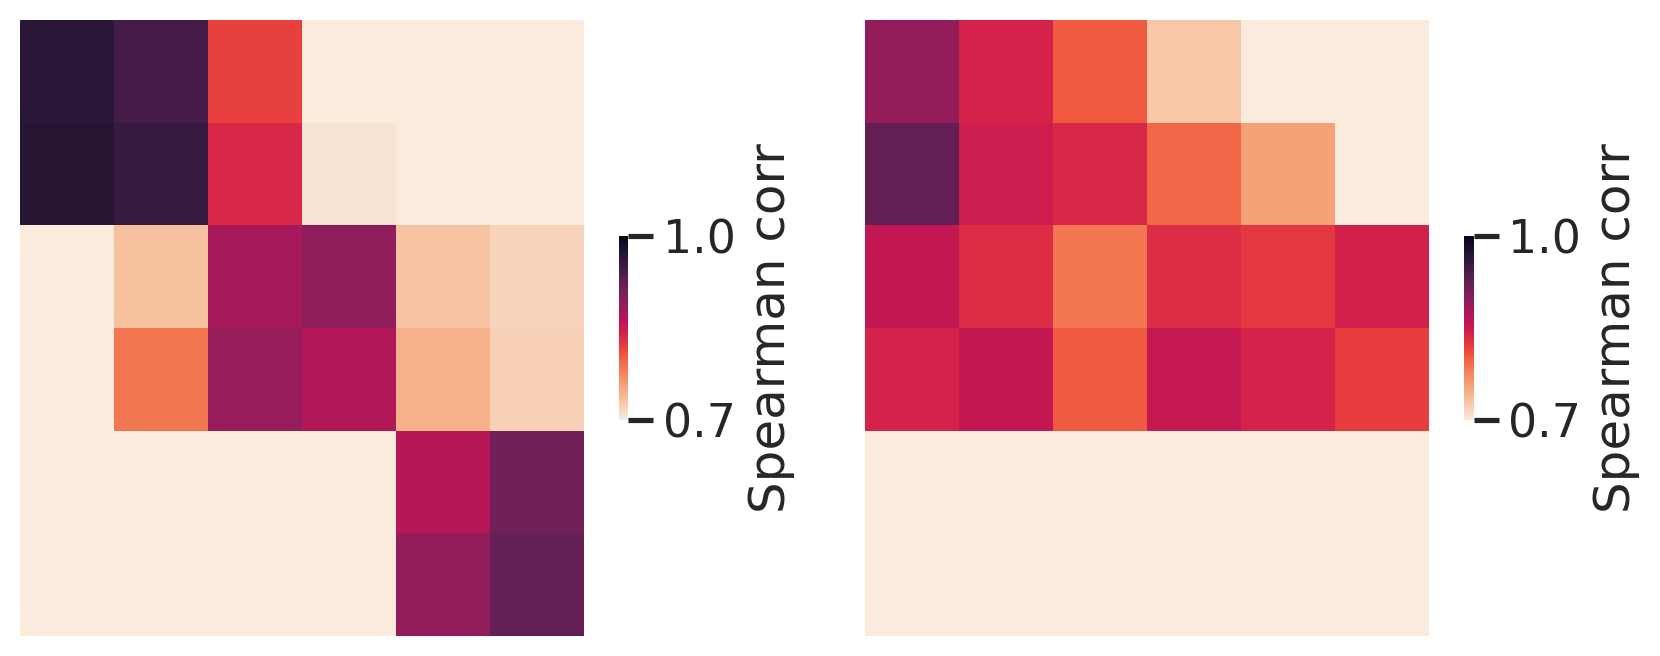

In [33]:
lbls = ['P28', 'P38', '','','','']
fig, axs = plt.subplots(1,2,figsize=(2*5,1*4))
ax = axs[0]
sns.heatmap(corrnew1, cmap='rocket_r', ax=ax, vmin=0.7, vmax=1, cbar_kws=dict(shrink=0.3, label='Spearman corr', ticks=[0.7, 1]),
            xticklabels=False,
            yticklabels=False,
           )
ax = axs[1]
sns.heatmap(corrnew2, cmap='rocket_r', ax=ax, vmin=0.7, vmax=1, cbar_kws=dict(shrink=0.3, label='Spearman corr', ticks=[0.7, 1]), 
            xticklabels=False,
            yticklabels=False,
           )
plt.show()

In [34]:
corrnew1

array([[0.96718711, 0.94578977, 0.8184778 , 0.68669431, 0.52222463,
        0.41459619],
       [0.96845414, 0.9558834 , 0.83817825, 0.7066497 , 0.52713166,
        0.42353051],
       [0.62477215, 0.73459455, 0.87583713, 0.89191912, 0.73169013,
        0.71836431],
       [0.68279628, 0.7845805 , 0.88715264, 0.86835296, 0.74543813,
        0.72149699],
       [0.26078184, 0.35868547, 0.48693155, 0.54153318, 0.86496584,
        0.91173807],
       [0.34826662, 0.44534592, 0.5505265 , 0.57583367, 0.88973389,
        0.92260063]])

In [43]:
np.mean([np.mean(corrnew1[:2,:2]), np.mean(corrnew1[2:4,2:4]), np.mean(corrnew1[4:,4:])])

0.9124678915436295